In [157]:
def map_x_with_data(x, data):
    print('x: ', x)
    print(data)
    return data.iloc[x]

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import *


1.9516519883375258 2305.522916332374


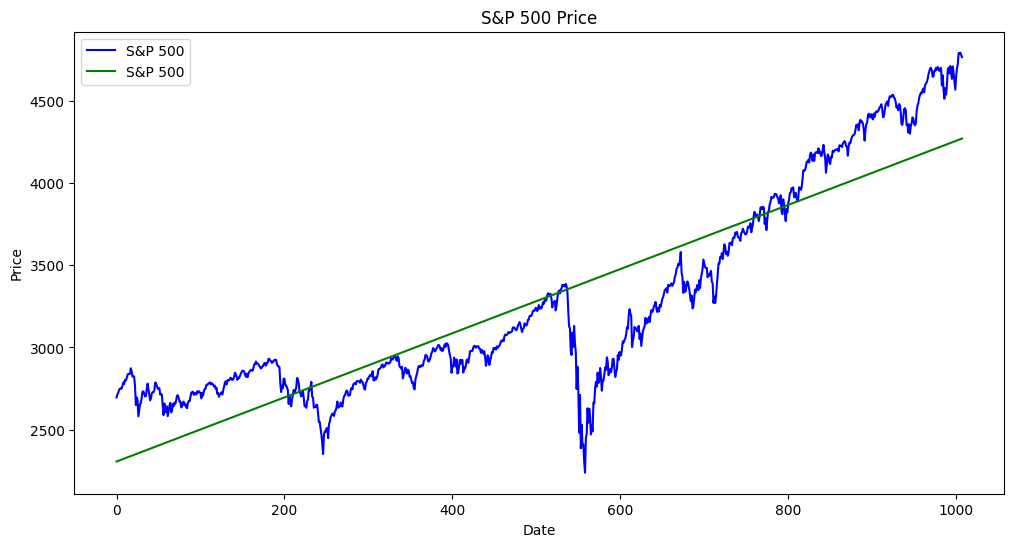

In [159]:
snpdata = pd.read_csv('S&P 500 Historical Data 2018 to 2022.csv')
snpdf = snpdata.set_index(pd.DatetimeIndex(snpdata['Date']))
x = np.array([i for i in reversed(range(len(snpdf['Price'])))])
snpdf['Price'] = snpdf['Price'].str.replace(',','').astype(float)
snpdf['Open'] = snpdf['Open'].str.replace(',','').astype(float)
snpdf['High'] = snpdf['High'].str.replace(',','').astype(float)
snpdf['Low'] = snpdf['Low'].str.replace(',','').astype(float)
plt.figure(figsize=(12, 6))
plt.plot(x, snpdf['Price'], color='blue', label='S&P 500')
plt.title('S&P 500 Price')
plt.xlabel('Date')
plt.ylabel('Price')


# Draw a straight line of best fit for S&P 500
# plt.figure(figsize=(12, 6))
x = np.array([i for i in reversed(range(len(snpdf['Price'])))])
# # convert the data to float
y = np.array(snpdf['Price'])
m, b = np.polyfit(x, y, 1)
print(m,b)
plt.plot(x, m*x + b, color='green', label='S&P 500')


plt.legend()
plt.show()

In [160]:

# calculate the differce between the line and the data 
# for S&P 500

# print(snpdf['Price'])

# let y be the data
# let x be the index

calculated_y = m*x + b
print(calculated_y)
# find out the actual value vs the calculated value
# for S&P 500
difference = y - calculated_y

# convernt array to numpy array 
difference = np.array(difference.tolist())

# caluclate the confidence interval for the difference
# for S&P 500
diff_CI_mean = difference.mean()
diff_CI_std = difference.std()
diff_CI_n = len(difference)
# diff_CI_z = 1.96
diff_t_value = stats.t.ppf(1-0.05, diff_CI_n)
diff_CI_lower_snp = diff_CI_mean - diff_t_value * diff_CI_std / sqrt(diff_CI_n)
diff_CI_upper_snp = diff_CI_mean + diff_t_value * diff_CI_std / sqrt(diff_CI_n)
print('S&P 500 Difference Standard Deviation: ', diff_CI_std)
print('S&P 500 Difference n: ', diff_CI_n)
print('S&P 500 Difference Mean: ', diff_CI_mean)
print('S&P 500 Difference Confidence Interval: ', diff_CI_lower_snp, diff_CI_upper_snp)






[4270.83646859 4268.8848166  4266.93316461 ... 2309.42622031 2307.47456832
 2305.52291633]
S&P 500 Difference Standard Deviation:  289.6083928453173
S&P 500 Difference n:  1008
S&P 500 Difference Mean:  -6.388117548166995e-13
S&P 500 Difference Confidence Interval:  -15.017839243915047 15.017839243913768


32.55392699160869 -5403.8964717477065


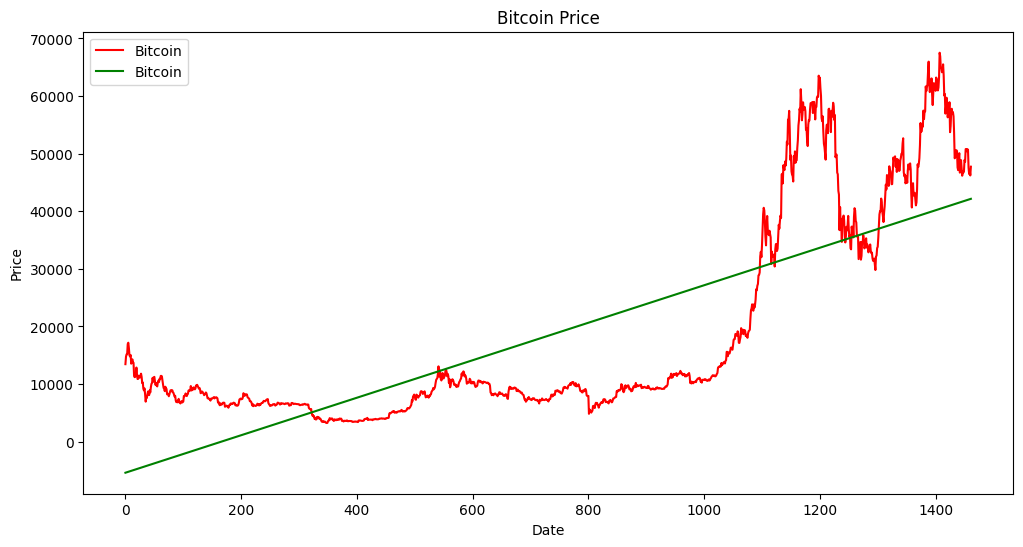

In [161]:
# Bitcoin
bitcoindata = pd.read_csv('Bitcoin Historical Data - Investing.com 2018 to 2022.csv')
bitcoindf = bitcoindata.set_index(pd.DatetimeIndex(bitcoindata['Date']))
x = np.array([i for i in reversed(range(len(bitcoindf['Price'])))])
y = np.array(bitcoindf['Price'])
bitcoindf['Price'] = bitcoindf['Price'].str.replace(',','').astype(float)
bitcoindf['Open'] = bitcoindf['Open'].str.replace(',','').astype(float)
bitcoindf['High'] = bitcoindf['High'].str.replace(',','').astype(float)
bitcoindf['Low'] = bitcoindf['Low'].str.replace(',','').astype(float)
plt.figure(figsize=(12, 6))
plt.plot(x, bitcoindf['Price'], color='red', label='Bitcoin')
plt.title('Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Draw a straight line of best fit for bitcoin
# plt.figure(figsize=(12, 6))
x = np.array([i for i in reversed(range(len(bitcoindf['Price'])))])
# # convert the data to float
y = np.array(bitcoindf['Price'])
m, b = np.polyfit(x, y, 1)
print(m,b)
plt.plot(x, m*x + b, color='green', label='Bitcoin')

plt.legend()
plt.show()



In [162]:
# calculate the differce between the line and the data 
# for Bitcoin

# print(bitcoindf['Price'])

# let y be the data
# let x be the index
calculated_y = m*x + b

# find out the actual value vs the calculated value

# for Bitcoin
difference = y - calculated_y

# convernt array to numpy array
difference = np.array(difference.tolist())

print(difference)

# caluclate the confidence interval for the difference
# for Bitcoin
diff_CI_mean = difference.mean()
print(diff_CI_mean)
diff_CI_std = difference.std()
diff_CI_n = len(difference)
print(diff_CI_std)

diff_t_value = stats.t.ppf(1-0.05, diff_CI_n)
diff_CI_lower_bitcoin = diff_CI_mean - diff_t_value * diff_CI_std / sqrt(diff_CI_n)
diff_CI_upper_bitcoin = diff_CI_mean + diff_t_value * diff_CI_std / sqrt(diff_CI_n)
print('Bitcoin Difference Confidence Interval: ', diff_CI_lower_bitcoin, diff_CI_upper_bitcoin)


[ 5580.60913701  4094.663064    5031.01699099 ... 20495.38861776
 20125.44254476 18848.79647175]
-7.325724766127225e-12
11252.814037885066
Bitcoin Difference Confidence Interval:  -484.38422188758824 484.3842218875736


So what does this means ? 

Bitcoin Difference Confidence Interval:  -484.3844321022497 484.38443210223505
S&P 500 Difference Confidence Interval:  -15.017852962637269 15.01785296263599

This means with a given regression line , we can be 95% confidence that the difference between the actual shock value verus the regression line will fall within the confidence interval 

...



In [163]:
def calculate_Bitcoin_Value(date):

    bitcoindata = pd.read_csv('Bitcoin Historical Data - Investing.com 2018 to 2022.csv')
    bitcoindf = bitcoindata.set_index(pd.DatetimeIndex(bitcoindata['Date']))
    bitcoindf['Price'] = bitcoindf['Price'].str.replace(',','').astype(float)
    date = pd.to_datetime(date)
    date_delta = (bitcoindf.index[0] - date).days
    x = np.array([i for i in reversed(range(len(bitcoindf['Price'])))])
    y = np.array(bitcoindf['Price'])
    m, b = np.polyfit(x, y, 1) # calcualte the slope and y intercept 
    
    # calculated value of x 
    x = np.array([i for i in reversed(range(len(bitcoindf['Price'])))])[0].item()
    x = x + date_delta
    calculated_y = m*x + b

    return calculated_y

In [164]:
def calculate_SNP_Value(date):
    # calculate the differce between the line and the data 
    # for S&P 500
    # convert date to datetime 
    snpdata = pd.read_csv('S&P 500 Historical Data 2018 to 2022.csv')
    snpdf = snpdata.set_index(pd.DatetimeIndex(snpdata['Date']))
    snpdf['Price'] = snpdf['Price'].str.replace(',','').astype(float)
    date = pd.to_datetime(date)
    date_delta = (snpdf.index[0] - date).days
    x = np.array([i for i in reversed(range(len(snpdf['Price'])))])
    y = np.array(snpdf['Price'])
    m, b = np.polyfit(x, y, 1) # calcualte the slope and y intercept 
    
    # # # calculated value of x 
    x = np.array([i for i in reversed(range(len(snpdf['Price'])))])[0].item()
    x = x + date_delta
    calculated_y = m*x + b


    return calculated_y


Conclusion ... 

In [165]:
SNPvalue = calculate_SNP_Value('2021-01-03')

print('Based on our model, the S&P 500 value on 2021-01-03 is: ', SNPvalue)
print('standard deviation: ', diff_CI_std)
print('confidence interval lower: ', diff_CI_lower_snp)
print('confidence interval upper: ', diff_CI_upper_snp)

print('we are 95% confidence that the expected price will fall in between ', SNPvalue + diff_CI_lower_snp, ' and ', SNPvalue + diff_CI_upper_snp)






Based on our model, the S&P 500 value on 2021-01-03 is:  4977.334488366447
standard deviation:  11252.814037885066
confidence interval lower:  -15.017839243915047
confidence interval upper:  15.017839243913768
expected price will fall in between  4962.316649122532  and  4992.352327610361


In [166]:
Bitcoinvalue = calculate_Bitcoin_Value('2021-01-03')

print('Based on our model, the Bitcoin value on 2021-01-03 is: ', Bitcoinvalue)
print('standard deviation: ', diff_CI_std)
print('confidence interval lower: ', diff_CI_lower_bitcoin)
print('confidence interval upper: ', diff_CI_upper_bitcoin)

print('we are 95% confidence that the expected price will fall in between ', Bitcoinvalue + diff_CI_lower_bitcoin, ' and ', Bitcoinvalue + diff_CI_upper_bitcoin)




Based on our model, the Bitcoin value on 2021-01-03 is:  53974.46636094654
standard deviation:  11252.814037885066
confidence interval lower:  -484.38422188758824
confidence interval upper:  484.3842218875736
expected price will fall in between  53490.082139058955  and  54458.850582834115
